# Generate Beautiful map using GeoPandas

## Imports and dataset

In [1]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/323.6 kB ? eta -:--:--
   --------- ----------------------------- 81.9/323.6 kB 907.3 kB/s eta 0:00:01
   --------------------------- ------------ 225.3/323.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  317.4/323.6 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.2 MB 4.3 MB/s eta 0:00:04
    --------------------------------------- 0.3/16.2 MB 3.2 MB/s eta 0:00:06
   - -------------------------------------- 0.5/16.2 MB 3.3 MB/s eta 0:00:05
   - -------------------------------------- 0.7/16.2 MB 3.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/16.2 MB 3.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.1/16.2 MB 3.9 MB/s eta 0:00:04
   --

In [7]:
gpd.__version__

'1.0.1'

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = gpd.read_file('district.zip')
df.head()

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJAR>T,None,24,673,539476.764723,4.791280e+09,"POLYGON ((3108952.09 3942577.01, 3109009.987 3..."
1,AHMAD>B>D,GUJAR>T,None,24,438,857254.094647,6.966374e+09,"POLYGON ((3193648.356 3920619.089, 3193646.392..."
2,>NAND,GUJAR>T,None,24,440,393046.690523,3.054307e+09,"POLYGON ((3297696.184 3879979.348, 3297775.311..."
3,DEVBHUMI DW>RKA,GUJAR>T,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((2924145.687 3865429.524, 29241..."
4,J>MNAGAR,GUJAR>T,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((3044918.968 3859136.847, 30448..."


In [27]:
df.describe()

,State_LGD,Shape_Leng,Shape_Area
count,742.000000,7.420000e+02,7.420000e+02
mean,17.797844,4.733661e+05,4.284163e+09
std,10.034332,2.773417e+05,6.655170e+09
min,0.000000,4.472646e+03,6.901054e+05
25%,9.000000,3.106391e+05,1.939156e+09
50%,18.000000,4.233099e+05,3.211114e+09
75%,24.000000,5.818102e+05,5.005494e+09
max,38.000000,3.197190e+06,1.539267e+11


In [33]:
df['Shape_Area'].min()

690105.447321

In [35]:
df['Shape_Area'].max()

153926719386.0

## Basic map with `df.plot()`

<Axes: >

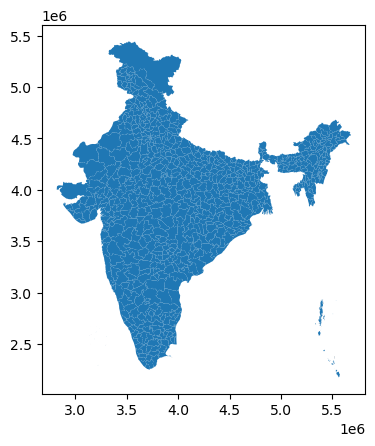

In [19]:
df.plot()

<Axes: >

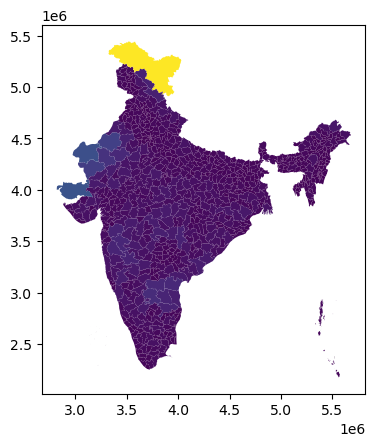

In [21]:
df.plot(column="Shape_Area")

<Axes: >

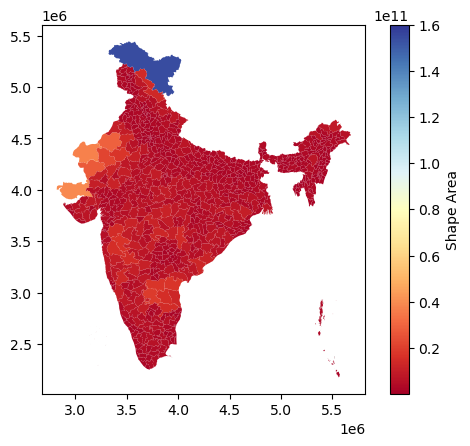

In [37]:
df.plot(column="Shape_Area", cmap='RdYlBu', legend=True, vmin=600000, vmax=160000000000,
        legend_kwds={"label": "Shape Area"})

## Interacting with axis and label

Text(235.62618547730642, 0.5, 'Latitude')

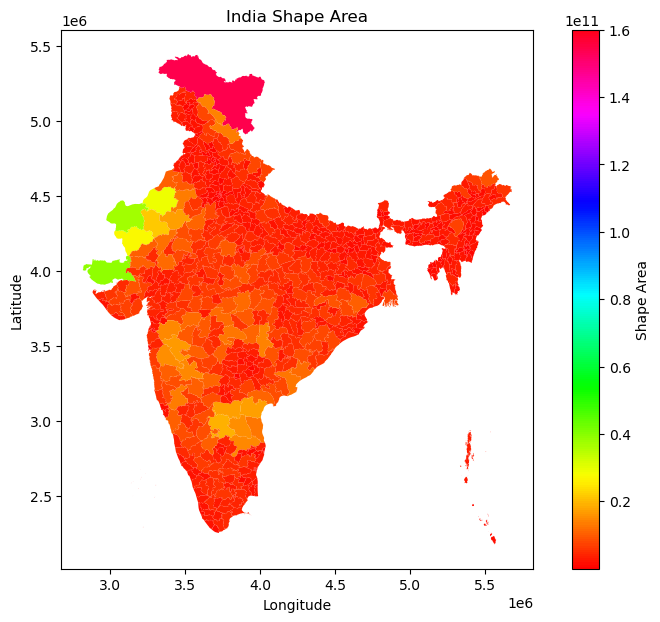

In [41]:
fig, ax1 = plt.subplots(1,1,figsize=(10,7))
ax1.set_title("India Shape Area")
plot = df.plot(column="Shape_Area", ax=ax1, cmap='hsv', legend=True, vmin=600000, vmax=160000000000,
        legend_kwds={"label": "Shape Area"})
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

# ax1.set_xticks([])
# ax1.set_yticks([])

## Automation on maps

In [101]:
df['State'] = df['STATE'].str.replace('|' ,'I')

In [103]:
df['State'] = df['State'].str.replace('>' ,'A')

In [139]:
India_States = df['State'][:].unique()
print(India_States[:5])

['GUJARAT' 'MADHYA PRADESH' 'UTTAR PRADESH' 'RAJASTHAN' 'KERALA']


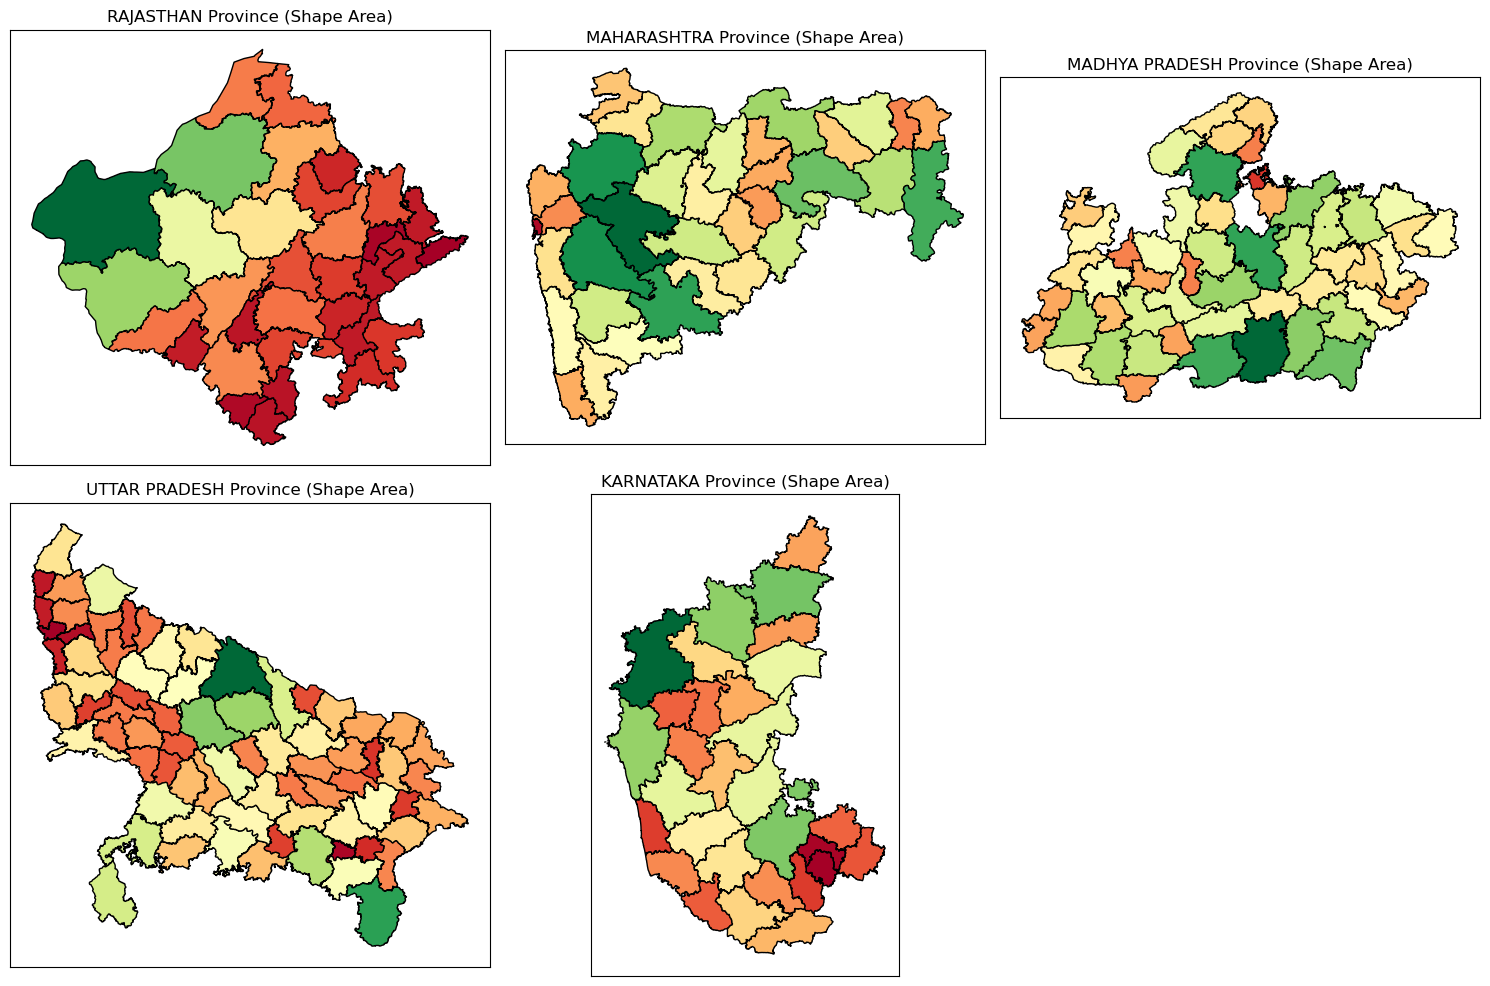

In [145]:
top_5_states = df.groupby('State')['Shape_Area'].sum().nlargest(5).index

# Create the subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 grid for top 5 states
axis = ax.flatten()

# Loop through the top 5 states and plot each one
for i, (ax, India_State) in enumerate(zip(axis, top_5_states)):

    # Filter the DataFrame for the current state
    df_state = df[df['State'] == India_State]

    # Plot the data on the current axis
    ax.set_title(f"{India_State} Province (Shape Area)")
    plot = df_state.plot(column="Shape_Area", ax=ax, cmap='RdYlGn', edgecolor='#000000')
    ax.set_xticks([])
    ax.set_yticks([])

# Remove the unused subplot
fig.delaxes(axis[-1])

# Adjust layout
plt.tight_layout()
plt.show()

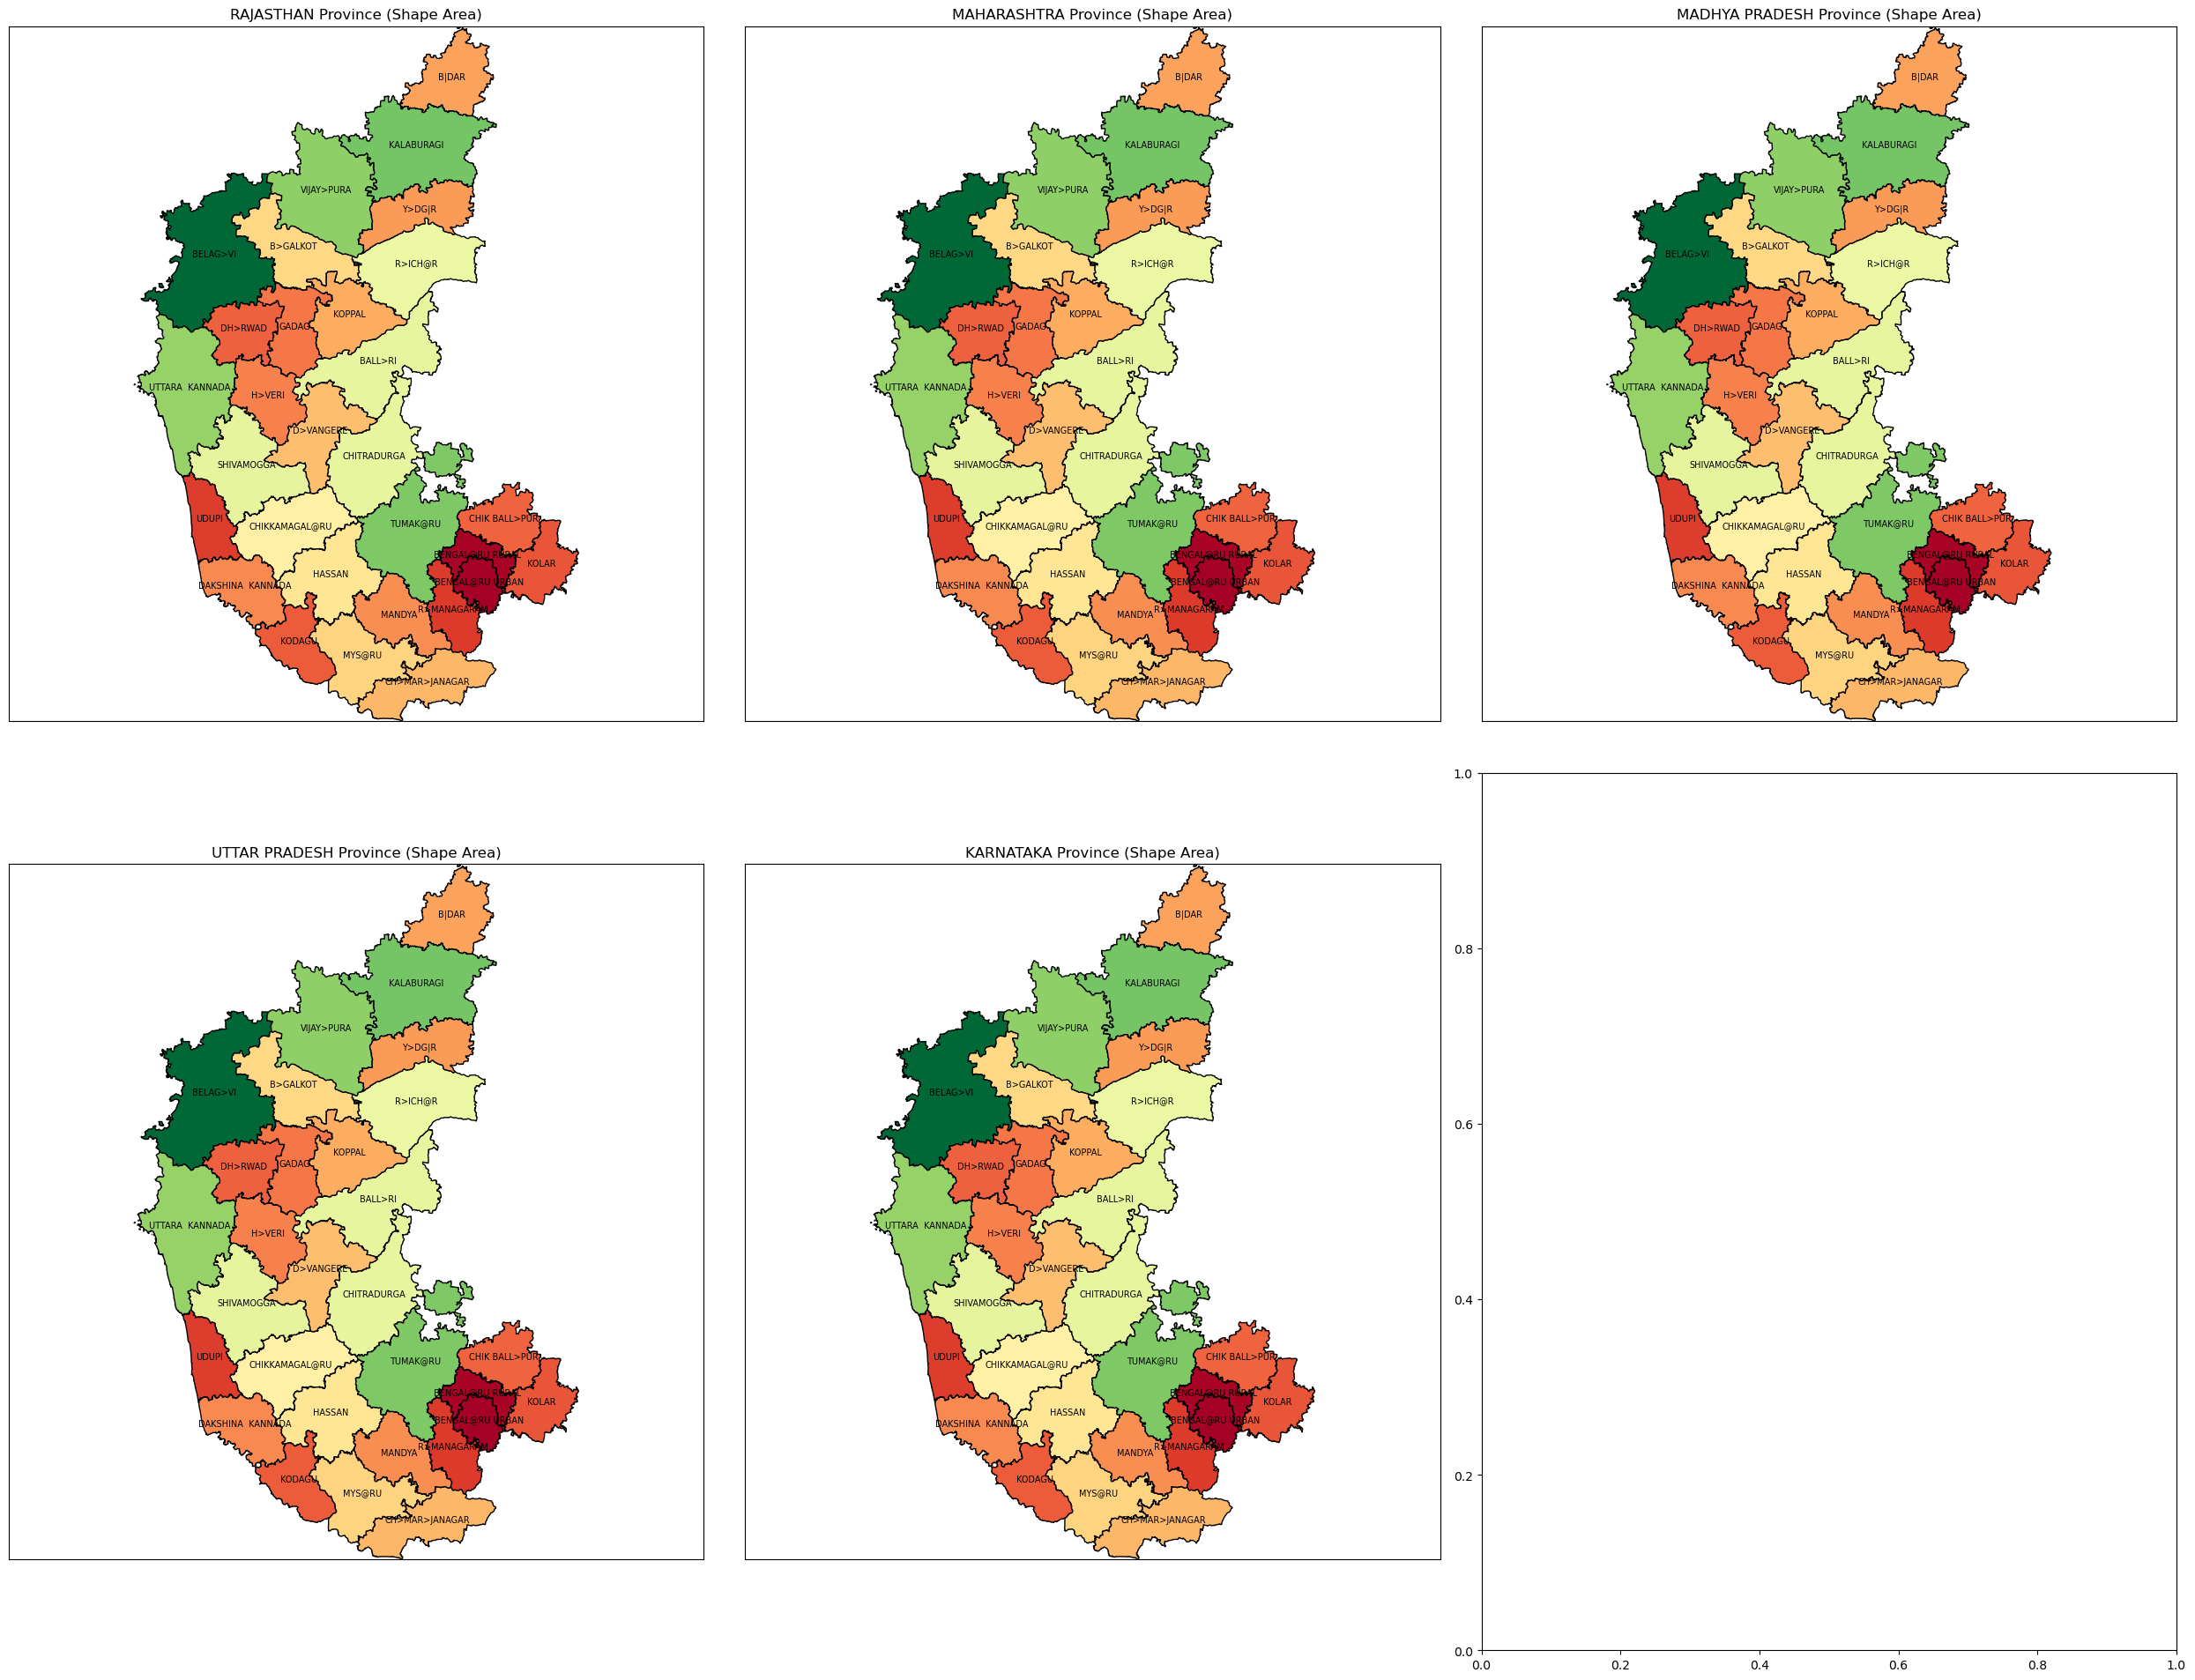

In [181]:
# Getting started with matplotlib subplots
import numpy as np

top_5_states = df.groupby('State')['Shape_Area'].sum().nlargest(5).index

fig, ax = plt.subplots(2, 3, figsize=(25, 20))
axis = ax.flatten()


# Loop based on axis and top provinces
for i, (ax, province) in enumerate(zip(axis, top_provinces)):

    # Select the province
    df_state = df[df['State'] == India_State]

    # Calculate geometry bounds
    x1, y1, x2, y2 = df_state.geometry.total_bounds

    # Zoom to the selected feature
    max_range = np.array([x2 - x1, y2 - y1]).max() / 2.0
    ax.set_xlim((x1 + x2) * 0.5 - max_range - 0.05, (x1 + x2) * 0.5 + max_range + 0.05)
    ax.set_ylim((y1 + y2) * 0.5 - max_range - 0.05, (y1 + y2) * 0.5 + max_range + 0.05)

    # Label feature on map
    df_state.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', size=7), axis=1)

    # Plot province shape area
    ax.set_title(f"{province} Province (Shape Area)")
    plot = df_state.plot(column="Shape_Area", ax=ax, cmap='RdYlGn', edgecolor='black')
    ax.set_xticks([])
    ax.set_yticks([])

# Remove unnecessary white spaces
fig.tight_layout()
fig.savefig(r'C:\Users\91809\OneDrive\Pictures\Documents\Python\plots.jpg', dpi=500, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


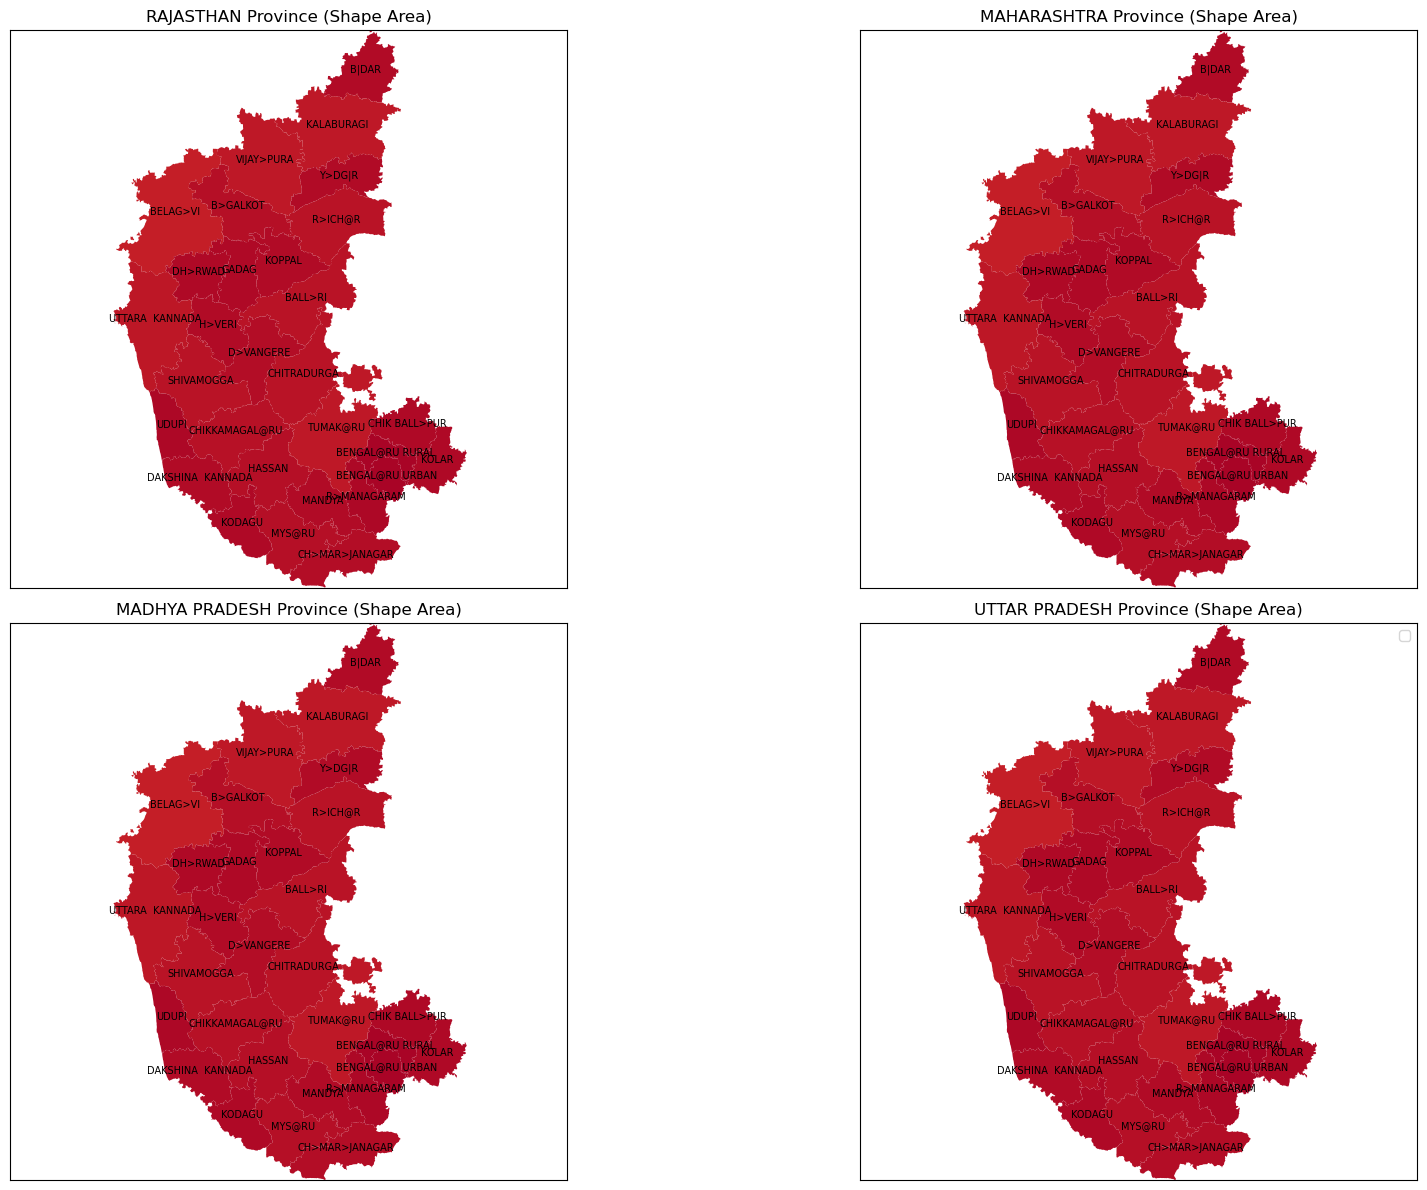

In [183]:
import numpy as np

# getting start with matplotlib suplots
fig, ax = plt.subplots(2,2,figsize=(20,12))
axis = ax.flatten()

# for loop based on axis and province
for i, (ax, province) in enumerate(zip(axis,top_provinces)):

  # select the province
  df_state = df[df['State'] == India_State]

  # calculate geometry bounds
  x1, y1, x2, y2 = df_state.geometry.total_bounds

  # zoom to the selected feature
  max_range = np.array([x2-x1, y2-y1]).max()/2.0
  ax.set_xlim((x1+x2)*0.5-max_range-0.05, (x1+x2)*0.5+max_range+0.05)
  ax.set_ylim((y1+y2)*0.5-max_range-0.05, (y1+y2)*0.5+max_range+0.05)

  # label feature on map
  df_state.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', size=7),axis=1)

  # plot province shape area
  ax.set_title(f"{province} Province (Shape Area)")
  plot = df_state.plot(column="Shape_Area", ax=ax, cmap='RdYlGn', vmin=6800000, vmax=200000000000)
  ax.set_xticks([])
  ax.set_yticks([])

# Remove unncessary white spaces

plot.legend()
fig.tight_layout()
fig.savefig(r'C:\Users\91809\OneDrive\Pictures\Documents\Python\final_map.jpg', dpi=500, bbox_inches='tight')